In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import jax
import jax.numpy as jnp
from jax import grad
import time

In [3]:
# Define convolution function using JAX
def convolution_2d(x, kernel):
    input_height, input_width = x.shape
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2

    # Pad the input array by adding extra pixel
    padded_x = jnp.pad(x, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize the output matrix
    output_data = jnp.zeros_like(x)

    # Perform the convolution operation
    for i in range(input_height):
        for j in range(input_width):
            # Extract the region of interest
            region = padded_x[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and summation
            output_data = output_data.at[i, j].set(jnp.sum(region * kernel))
            # Equivalent to : output_data[i, j] = jnp.sum(region * kernel)

    return output_data

# Define loss function
def loss_fn(kernel, x, y_true):
    y_pred = convolution_2d(x, kernel)
    return jnp.mean((y_pred - y_true) ** 2)  # Mean squared error

Training time: 201.86 seconds


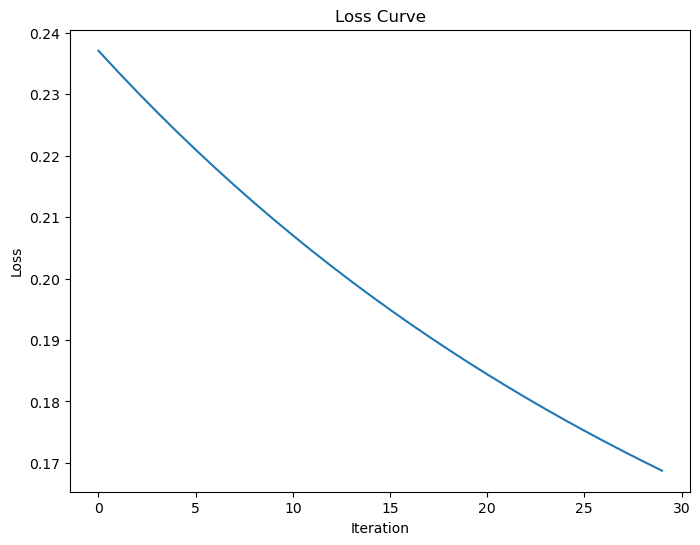

In [6]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = x_train[0]
y_true = x.copy()

# Add salt-and-pepper noise
num_corrupted_pixels = 100
for _ in range(num_corrupted_pixels):
    i, j = np.random.randint(0, x.shape[0]), np.random.randint(0, x.shape[1])
    x[i, j] = np.random.choice([0, 255])

# Normalize images
y_true = y_true.astype(np.float32) / 255.0
x = x.astype(np.float32) / 255.0


# Initialize kernel
kernel = jnp.array([[0.01, 0.0, 0.0],
                    [-1.0, 0.0, 1.0],
                    [0.0, 0.0, 0.0]])  # Random kernel for horizontal edge detection

# Gradient of the loss function w.r.t. the kernel
loss_grad = grad(loss_fn)

# Training loop
learning_rate = 0.01
num_iterations = 30

start_time = time.time()

losses = []
for i in range(num_iterations):
    gradients = loss_grad(kernel, x, y_true)
    kernel -= learning_rate * gradients  # Update kernel with gradient descent

    # Compute and store the loss
    current_loss = loss_fn(kernel, x, y_true)
    losses.append(current_loss)

    # # Print loss every 10 iterations
    # if i % 10 == 0:
    #     print(f"Iteration {i}, Loss: {current_loss:.4f}")

end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Visualize results
plt.figure(figsize=(8, 6))

# # Plot loss over iterations
# plt.subplot(2, 2, 1)
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

# # Display original noisy image
# plt.subplot(2, 2, 2)
# plt.imshow(x, cmap='gray')
# plt.title("Noisy Image")
# plt.axis('off')

# # Display target clean image
# plt.subplot(2, 2, 3)
# plt.imshow(y_true, cmap='gray')
# plt.title("Target (Clean Image)")
# plt.axis('off')

# # Display denoised image
# y_denoised = convolution_2d(x, kernel)
# plt.subplot(2, 2, 4)
# plt.imshow(y_denoised, cmap='gray')
# plt.title("Denoised Image")
# plt.axis('off')

# plt.tight_layout()
plt.show()


In [12]:
# Use SGD instead of gradient descent
from sklearn.utils import shuffle

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = x_train[0]
y_true = x.copy()

# Add salt-and-pepper noise
num_corrupted_pixels = 100
for _ in range(num_corrupted_pixels):
    i, j = np.random.randint(0, x.shape[0]), np.random.randint(0, x.shape[1])
    x[i, j] = np.random.choice([0, 255])

# Normalize images
y_true = y_true.astype(np.float32) / 255.0
x = x.astype(np.float32) / 255.0


# Initialize kernel
kernel = jnp.array([[0.01, 0.0, 0.0],
                    [-1.0, 0.0, 1.0],
                    [0.0, 0.0, 0.0]])  # Random kernel for horizontal edge detection

# Gradient of the loss function w.r.t. the kernel
loss_grad = grad(loss_fn)

# Training loop
learning_rate = 0.01
num_iterations = 30

losses = []
for i in range(num_iterations):
    x, t_true = shuffle(x, y_true)

    gradients = loss_grad(kernel, x[0:63, 0:63], y_true[0:63, 0:63])
    kernel -= learning_rate * gradients  # Update kernel with gradient descent

    # Compute and store the loss
    current_loss = loss_fn(kernel, x[0:63, 0:63], y_true[0:63, 0:63])
    losses.append(current_loss)

    # Print loss every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {current_loss:.4f}")

# Visualize results

# # Plot loss over iterations
# plt.subplot(2, 2, 1)
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

# # Display original noisy image
# plt.subplot(2, 2, 2)
# plt.imshow(x, cmap='gray')
# plt.title("Noisy Image")
# plt.axis('off')

# # Display target clean image
# plt.subplot(2, 2, 3)
# plt.imshow(y_true, cmap='gray')
# plt.title("Target (Clean Image)")
# plt.axis('off')

# # Display denoised image
# y_denoised = convolution_2d(x, kernel)
# plt.subplot(2, 2, 4)
# plt.imshow(y_denoised, cmap='gray')
# plt.title("Denoised Image")
# plt.axis('off')

# plt.tight_layout()
plt.show()


Iteration 0, Loss: 0.2730
Iteration 10, Loss: 0.2477
Iteration 20, Loss: 0.2615


KeyboardInterrupt: 